# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city=[]
lat=[]           
lng=[]           
maxtemp=[]      
humidity=[]      
cloudiness=[]    
windspeed=[]    
country=[]       
date=[]
url='http://api.openweathermap.org/data/2.5/weather?q='
key='&appid='+weather_api_key
for index, location in enumerate(cities):
    try:
        weather=requests.get(url+location+'&units=imperial'+key).json()
        country.append(weather['sys']['country']) #country
        lng.append(weather['coord']['lon']) #longitude
        lat.append(weather['coord']['lat']) #latitude
        maxtemp.append(weather['main']['temp_max']) #max teperature
        humidity.append(weather['main']['humidity']) #humidity
        cloudiness.append(weather['clouds']['all']) #cloudiness
        windspeed.append(weather['wind']['speed']) #wind speed
        date.append(weather['dt']) #date
        print(f"Processing city number {index+1}:{location}.")
        if location not in city:
            city.append(location)
    except KeyError:
        print(f"Processing city number {index+1}:{location}. NO DATA FOUND")
        

Processing city number 1:jamestown.
Processing city number 2:lhokseumawe.
Processing city number 3:avarua.
Processing city number 4:albany.
Processing city number 5:mys shmidta. NO DATA FOUND
Processing city number 6:sumbe.
Processing city number 7:taolanaro. NO DATA FOUND
Processing city number 8:nikolskoye.
Processing city number 9:mersing.
Processing city number 10:diffa.
Processing city number 11:rikitea.
Processing city number 12:ilulissat.
Processing city number 13:yekaterinoslavka.
Processing city number 14:atuona.
Processing city number 15:guerrero negro.
Processing city number 16:kaitangata.
Processing city number 17:hokitika.
Processing city number 18:nizhneyansk. NO DATA FOUND
Processing city number 19:takoradi.
Processing city number 20:palu.
Processing city number 21:illoqqortoormiut. NO DATA FOUND
Processing city number 22:faanui.
Processing city number 23:avera.
Processing city number 24:castro.
Processing city number 25:ribeira grande.
Processing city number 26:bluff.
P

### Convert Raw Data to DataFrame
* Export the city data to a csv
* Display the DataFrame

In [5]:
weather_df=pd.DataFrame({'City':city,
                         "Country":country,
                         "Latitude":lat,
                         "Longitude":lng,
                         "Max Temp":maxtemp,
                         "Humidity":humidity,
                         "Cloudiness":cloudiness,
                         "Wind Speed": windspeed,
                         "Date":date
                        })
weather_df.head(5)


,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,jamestown,US,42.10,-79.24,77.00,60,40,6.93,1596143156
1,lhokseumawe,ID,5.18,97.15,77.81,82,100,3.42,1596143156
2,avarua,CK,-21.21,-159.78,69.80,64,100,5.82,1596143156
3,albany,US,42.60,-73.97,80.01,51,93,6.44,1596143156
4,sumbe,AO,-11.21,13.84,69.51,88,1,9.42,1596143047


## Inspect the data and remove the cities where the humidity > 100%.

In [6]:
cleaned_weather_df=weather_df[weather_df['Humidity']<=100]
cleaned_weather_df.reset_index(inplace=True)
cleaned_weather_df.drop(axis=1,labels="index", inplace=True)

In [7]:
# Export the City_Data to a csv
weather_df.to_csv("../output_data/cities.csv")

## Plotting the Data
* Save the plotted figures as a png

In [8]:
#Data to be plotted
city=cleaned_weather_df['City']
lat=cleaned_weather_df['Latitude']           
lng=cleaned_weather_df['Longitude']           
maxtemp=cleaned_weather_df["Max Temp"]      
humidity=cleaned_weather_df['Humidity']      
cloudiness=cleaned_weather_df['Cloudiness']    
windspeed=cleaned_weather_df['Wind Speed']    
country=cleaned_weather_df['Country']       
date=input('Enter the date for the corresponding data in MM/DD/YY')

Enter the date for the corresponding data in MM/DD/YY 07/30/20


### Latitude vs. Temperature Plot

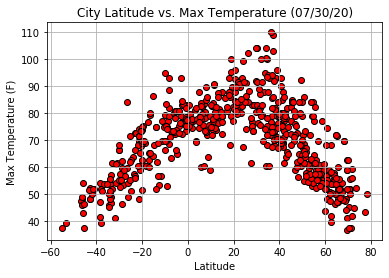

In [9]:
plt.scatter(x=lat, y=maxtemp, c='red', linewidths=1, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.grid()
plt.show()

### Latitude vs. Humidity Plot

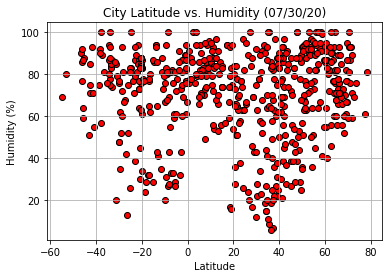

In [10]:
plt.scatter(x=lat, y=humidity, c='red', linewidths=1, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid()
plt.show()

### Latitude vs. Cloudiness Plot

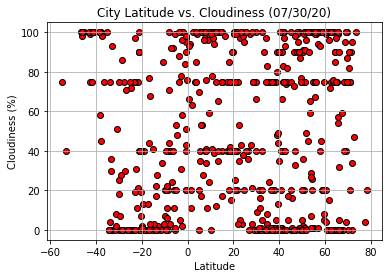

In [11]:
plt.scatter(x=lat, y=cloudiness, c='red', linewidths=1, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid()
plt.show()

### Latitude vs. Wind Speed Plot

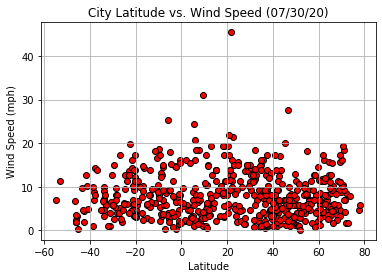

In [12]:
plt.scatter(x=lat, y=windspeed, c='red', linewidths=1, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid()
plt.show()

# Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
south_cleaned_weather_df=cleaned_weather_df[cleaned_weather_df['Latitude']<0]
north_cleaned_weather_df=cleaned_weather_df[cleaned_weather_df['Latitude']>=0]

In [15]:
# Northern Data to be plotted
ncity=north_cleaned_weather_df['City']
nlat=north_cleaned_weather_df['Latitude']           
nlng=north_cleaned_weather_df['Longitude']           
nmaxtemp=north_cleaned_weather_df["Max Temp"]      
nhumidity=north_cleaned_weather_df['Humidity']      
ncloudiness=north_cleaned_weather_df['Cloudiness']    
nwindspeed=north_cleaned_weather_df['Wind Speed']    
ncountry=north_cleaned_weather_df['Country']

In [17]:
# Southern Data to be plotted
scity=south_cleaned_weather_df['City']
slat=south_cleaned_weather_df['Latitude']           
slng=south_cleaned_weather_df['Longitude']           
smaxtemp=south_cleaned_weather_df["Max Temp"]      
shumidity=south_cleaned_weather_df['Humidity']      
scloudiness=south_cleaned_weather_df['Cloudiness']    
swindspeed=south_cleaned_weather_df['Wind Speed']    
scountry=south_cleaned_weather_df['Country']

### Northern Hemisphere - Wind Speed (mph) vs. Latitude

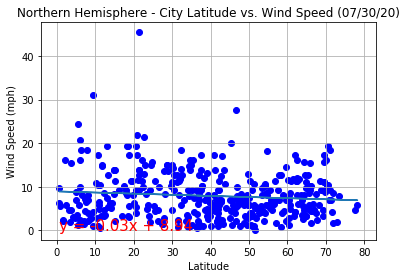

The r-squared value is : 0.009352016386151218


In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat,nwindspeed)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(nlat,regress_values)
plt.scatter(x=nlat, y=nwindspeed, c='blue')
plt.annotate(line_eq,xy=(nlat.min(),nwindspeed.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere - City Latitude vs. Wind Speed ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Southern Hemisphere - Wind Speed (mph) vs. Latitude

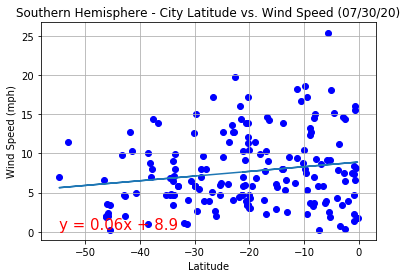

The r-squared value is : 0.028528076958762822


In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat,swindspeed)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(slat,regress_values)
plt.scatter(x=slat, y=swindspeed, c='blue')
plt.annotate(line_eq,xy=(slat.min(),swindspeed.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere - City Latitude vs. Wind Speed ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Northern Hemisphere - Temperature (F) vs. Latitude

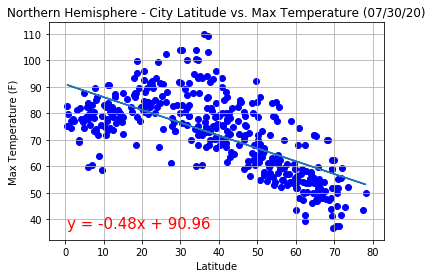

The r-squared value is : 0.4516137758899985


In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat,nmaxtemp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(nlat,regress_values)
plt.scatter(x=nlat, y=nmaxtemp, c='blue')
plt.annotate(line_eq,xy=(nlat.min(),nmaxtemp.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere - City Latitude vs. Max Temperature ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Southern Hemisphere - Temperature (F) vs. Latitude

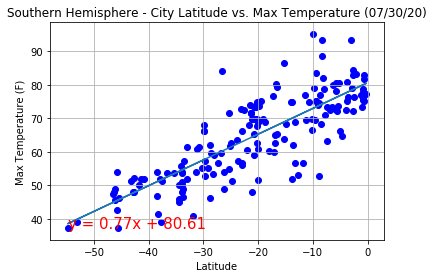

The r-squared value is : 0.6593196572735677


In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat,smaxtemp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(slat,regress_values)
plt.scatter(x=slat, y=smaxtemp, c='blue')
plt.annotate(line_eq,xy=(slat.min(),smaxtemp.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere - City Latitude vs. Max Temperature ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Northern Hemisphere - Humidity (%) vs. Latitude

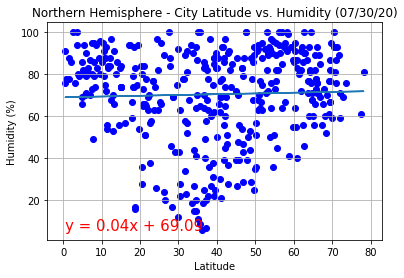

The r-squared value is : 0.0011215942730353637


In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat,nhumidity)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(nlat,regress_values)
plt.scatter(x=nlat, y=nhumidity, c='blue')
plt.annotate(line_eq,xy=(nlat.min(),nhumidity.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere - City Latitude vs. Humidity ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Southern Hemisphere - Humidity (%) vs. Latitude

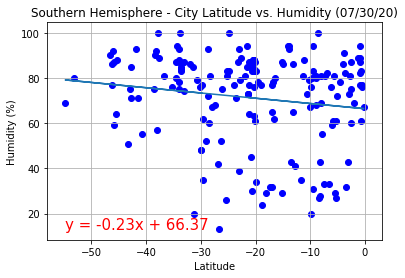

The r-squared value is : 0.02330213813540901


In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat,shumidity)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(slat,regress_values)
plt.scatter(x=slat, y=shumidity, c='blue')
plt.annotate(line_eq,xy=(slat.min(),shumidity.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere - City Latitude vs. Humidity ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Northern Hemisphere - Cloudiness (%) vs. Latitude

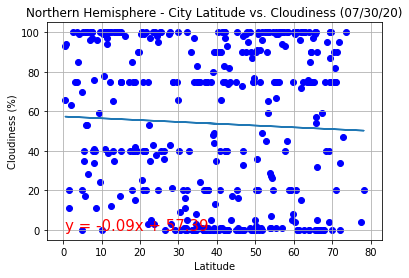

The r-squared value is : 0.002203986511106505


In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat,ncloudiness)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(nlat,regress_values)
plt.scatter(x=nlat, y=ncloudiness, c='blue')
plt.annotate(line_eq,xy=(nlat.min(),ncloudiness.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere - City Latitude vs. Cloudiness ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Southern Hemisphere - Cloudiness (%) vs. Latitude

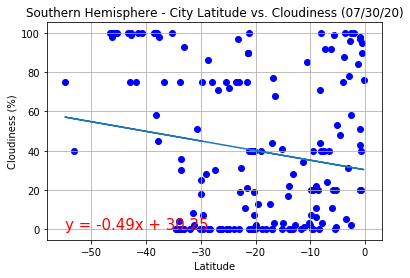

The r-squared value is : 0.029018918339203312


In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat,scloudiness)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(slat,regress_values)
plt.scatter(x=slat, y=scloudiness, c='blue')
plt.annotate(line_eq,xy=(slat.min(),scloudiness.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere - City Latitude vs. Cloudiness ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")